These results are for HBM-stack DRAM cache (16 interface of 128-MB) backed-up by DDR4 memory (2 interface of 32-GB).

In [64]:
import pandas as pd
import numpy as np
import sys
from matplotlib import pyplot as plt

import os

datadir = '/scr/babaie/policyBaselineRes/hbmCtrlrBug/dramCacheController/myPlots/res_Nov_14/GAPBS/set1'


def getStat(filename, stat):
    filename = os.path.join(filename).replace('\\','/')
    #print(stat)
    #print(filename)
    try:
        x = 0
        with open(filename) as f:
            readlines = f.readlines()
            for l in readlines:
                if stat in l and x == 0:
                    x = 1
                elif stat in l and x == 1:
                    return l
            return 0.0 #for cases where stat was not found
    except: #for cases where the file was not found
        return 0.0



Stats = ['simSeconds',
         'hostSeconds',
         'system.mem_ctrl.readReqs',
         'system.mem_ctrl.writeReqs',
         'system.mem_ctrl.servicedByWrQ',
         'system.mem_ctrl.mergedWrBursts',
         'system.mem_ctrl.numTotHits',
         'system.mem_ctrl.numTotMisses',
         'system.mem_ctrl.numColdMisses',
         'system.mem_ctrl.numHotMisses',
         'system.mem_ctrl.numRdMissClean',
         'system.mem_ctrl.numRdMissDirty',
         'system.mem_ctrl.numRdHit',
         'system.mem_ctrl.numWrMissClean',
         'system.mem_ctrl.numWrMissDirty',
         'system.mem_ctrl.numWrHit',
         'system.mem_ctrl.numRdHitDirty',
         'system.mem_ctrl.numRdHitClean',
         'system.mem_ctrl.numWrHitDirty',
         'system.mem_ctrl.numWrHitClean',
         'system.loc_mem_ctrl.dram.readBursts',
         'system.loc_mem_ctrl.dram.writeBursts',
         'system.far_mem_ctrl.dram.readBursts',
         'system.far_mem_ctrl.dram.writeBursts',
         'system.timingCpu0.exec_context.thread_0.numInsts',
         'system.timingCpu1.exec_context.thread_0.numInsts',
         'system.timingCpu2.exec_context.thread_0.numInsts',
         'system.timingCpu3.exec_context.thread_0.numInsts',
         'system.timingCpu4.exec_context.thread_0.numInsts',
         'system.timingCpu5.exec_context.thread_0.numInsts',
         'system.timingCpu6.exec_context.thread_0.numInsts',
         'system.timingCpu7.exec_context.thread_0.numInsts',
         'system.mem_ctrl.avgRdBWSys',
         'system.mem_ctrl.avgWrBWSys',
         'system.mem_ctrl.avgORBLen'         
          ]


# app = ['bc', 'bfs', 'cc', 'pr', 'tc']
app = ['bc', 'bfs', 'cc', 'pr']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_22/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = -1
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df = pd.DataFrame(rows, columns=[
         'app',
         'simSeconds',
         'hostSeconds',
         'readReqs',
         'writeReqs',
         'servicedByWrQ',
         'mergedWrBursts',
         'numTotHits',
         'numTotMisses',
         'numColdMisses',
         'numHotMisses',
         'numRdMissClean',
         'numRdMissDirty',
         'numRdHit',
         'numWrMissClean',
         'numWrMissDirty',
         'numWrHit',
         'numRdHitDirty',
         'numRdHitClean',
         'numWrHitDirty',
         'numWrHitClean',
         'system.loc_mem_ctrl.dram.readBursts',
         'system.loc_mem_ctrl.dram.writeBursts',
         'system.far_mem_ctrl.dram.readBursts',
         'system.far_mem_ctrl.dram.writeBursts',
         'numInsts0',
         'numInsts1',
         'numInsts2',
         'numInsts3',
         'numInsts4',
         'numInsts5',
         'numInsts6',
         'numInsts7',
         'avgRdBWSys',
         'avgWrBWSys',
         'avgORBLen'   
         ])

df['totNumInsts'] = df['numInsts0'].astype(int)+df['numInsts1'].astype(int)+df['numInsts2'].astype(int)+df['numInsts3'].astype(int)+df['numInsts4'].astype(int)+df['numInsts5'].astype(int)+df['numInsts6'].astype(int)+df['numInsts7'].astype(int)
df['totBW'] = (df['avgRdBWSys'].astype(float)+df['avgWrBWSys'].astype(float))/1000000000
df.to_csv("/scr/babaie/policyBaselineRes/hbmCtrlrBug/dramCacheController/myPlots/res_Nov_14/GAPBS/set1.csv")

In [65]:
### Set2

datadir2 = '/scr/babaie/policyBaselineRes/hbmCtrlrBug/dramCacheController/myPlots/res_Nov_14/GAPBS/set2'


Stats2 = ['simSeconds',
         'hostSeconds',
         'system.mem_ctrl.readReqs',
         'system.mem_ctrl.writeReqs',
         'system.mem_ctrl.servicedByWrQ',
         'system.mem_ctrl.mergedWrBursts',
         'system.timingCpu0.exec_context.thread_0.numInsts',
         'system.timingCpu1.exec_context.thread_0.numInsts',
         'system.timingCpu2.exec_context.thread_0.numInsts',
         'system.timingCpu3.exec_context.thread_0.numInsts',
         'system.timingCpu4.exec_context.thread_0.numInsts',
         'system.timingCpu5.exec_context.thread_0.numInsts',
         'system.timingCpu6.exec_context.thread_0.numInsts',
         'system.timingCpu7.exec_context.thread_0.numInsts',
         'system.mem_ctrl.avgRdBWSys',
         'system.mem_ctrl.avgWrBWSys',
         'system.mem_ctrl.avgORBLen'         
          ]


# app = ['bc', 'bfs', 'cc', 'pr', 'tc']
app = ['bc', 'bfs', 'cc', 'pr']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats2:
                    time_file_path = '{}/{}_22/stats.txt'.format(datadir2, a)
                    ret_line = getStat(time_file_path,stat)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = -1
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df2 = pd.DataFrame(rows, columns=[
         'app',
         'simSeconds',
         'hostSeconds',
         'readReqs',
         'writeReqs',
         'servicedByWrQ',
         'mergedWrBursts',
         'numInsts0',
         'numInsts1',
         'numInsts2',
         'numInsts3',
         'numInsts4',
         'numInsts5',
         'numInsts6',
         'numInsts7',
         'avgRdBWSys',
         'avgWrBWSys',
         'avgORBLen'   
         ])

df2['totNumInsts'] = df2['numInsts0'].astype(int)+df2['numInsts1'].astype(int)+df2['numInsts2'].astype(int)+df2['numInsts3'].astype(int)+df2['numInsts4'].astype(int)+df2['numInsts5'].astype(int)+df2['numInsts6'].astype(int)+df2['numInsts7'].astype(int)
df2['totBW'] = (df2['avgRdBWSys'].astype(float)+df2['avgWrBWSys'].astype(float))/1000000000
df2.to_csv("/scr/babaie/policyBaselineRes/hbmCtrlrBug/dramCacheController/myPlots/res_Nov_14/GAPBS/set2.csv")

In [66]:
### Set3

datadir3 = '/scr/babaie/policyBaselineRes/hbmCtrlrBug/dramCacheController/myPlots/res_Nov_14/GAPBS/set3'


Stats3 = ['simSeconds',
         'hostSeconds',
         'system.mem_ctrl.readReqs',
         'system.mem_ctrl.writeReqs',
         'system.mem_ctrl.servicedByWrQ',
         'system.mem_ctrl.mergedWrBursts',
         'system.timingCpu0.exec_context.thread_0.numInsts',
         'system.timingCpu1.exec_context.thread_0.numInsts',
         'system.timingCpu2.exec_context.thread_0.numInsts',
         'system.timingCpu3.exec_context.thread_0.numInsts',
         'system.timingCpu4.exec_context.thread_0.numInsts',
         'system.timingCpu5.exec_context.thread_0.numInsts',
         'system.timingCpu6.exec_context.thread_0.numInsts',
         'system.timingCpu7.exec_context.thread_0.numInsts',
         'system.mem_ctrl.avgRdBWSys',
         'system.mem_ctrl.avgWrBWSys',
         'system.mem_ctrl.avgORBLen'         
          ]


# app = ['bc', 'bfs', 'cc', 'pr', 'tc']
app = ['bc', 'bfs', 'cc', 'pr']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats3:
                    time_file_path = '{}/{}_22/stats.txt'.format(datadir3, a)
                    ret_line = getStat(time_file_path,stat)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = -1
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df3 = pd.DataFrame(rows, columns=[
         'app',
         'simSeconds',
         'hostSeconds',
         'readReqs',
         'writeReqs',
         'servicedByWrQ',
         'mergedWrBursts',
         'numInsts0',
         'numInsts1',
         'numInsts2',
         'numInsts3',
         'numInsts4',
         'numInsts5',
         'numInsts6',
         'numInsts7',
         'avgRdBWSys',
         'avgWrBWSys',
         'avgORBLen'   
         ])

df3['totNumInsts'] = df3['numInsts0'].astype(int)+df3['numInsts1'].astype(int)+df3['numInsts2'].astype(int)+df3['numInsts3'].astype(int)+df3['numInsts4'].astype(int)+df3['numInsts5'].astype(int)+df3['numInsts6'].astype(int)+df3['numInsts7'].astype(int)
df3['totBW'] = (df3['avgRdBWSys'].astype(float)+df3['avgWrBWSys'].astype(float))/1000000000
df3.to_csv("/scr/babaie/policyBaselineRes/hbmCtrlrBug/dramCacheController/myPlots/res_Nov_14/GAPBS/set3.csv")

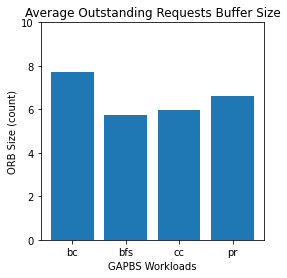

In [67]:
x = df['app']

y = df['avgORBLen'].astype(float)

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(4, 4)

plt.ylim([0,10])

plt.bar(x, y)


plt.title("Average Outstanding Requests Buffer Size")
plt.xlabel("GAPBS Workloads")
plt.ylabel("ORB Size (count)")
plt.show()

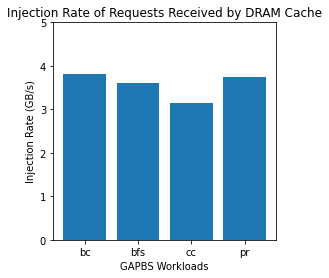

In [68]:
x = df['app']

y = (df['readReqs'].astype(float) + df['writeReqs'].astype(float))*64/1000000000 / df['simSeconds'].astype(float)

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(4, 4)

plt.ylim([0,5])

plt.bar(x, y)


plt.title("Injection Rate of Requests Received by DRAM Cache")
plt.xlabel("GAPBS Workloads")
plt.ylabel("Injection Rate (GB/s)")
plt.show()

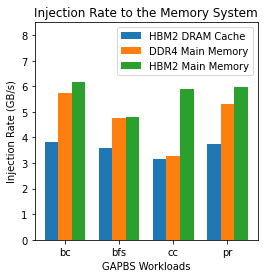

In [69]:
x = df['app']
x_axis = np.arange(len(x))

y = (df['readReqs'].astype(float) + df['writeReqs'].astype(float))*64/1000000000 / df['simSeconds'].astype(float)
y2 = (df2['readReqs'].astype(float) + df2['writeReqs'].astype(float))*64/1000000000 / df2['simSeconds'].astype(float)
y3 = (df3['readReqs'].astype(float) + df3['writeReqs'].astype(float))*64/1000000000 / df3['simSeconds'].astype(float)

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(4, 4)

plt.ylim([0,8.5])

plt.bar(x_axis -0.25, y, width=0.25, label = 'HBM2 DRAM Cache')
plt.bar(x_axis, y2, width=0.25, label = 'DDR4 Main Memory')
plt.bar(x_axis +0.25, y3, width=0.25, label = 'HBM2 Main Memory')

plt.xticks(x_axis, x)

plt.title("Injection Rate to the Memory System")
plt.xlabel("GAPBS Workloads")
plt.ylabel("Injection Rate (GB/s)")
plt.legend()
plt.show()

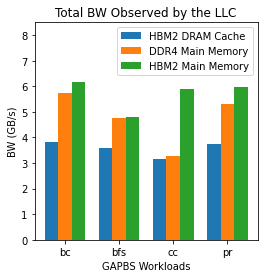

In [70]:
x = df['app']
x_axis = np.arange(len(x))

y = df['totBW'].astype(float)
y2 = df2['totBW'].astype(float)
y3 = df3['totBW'].astype(float)

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(4, 4)

plt.ylim([0,8.5])

plt.bar(x_axis -0.25, y, width=0.25, label = 'HBM2 DRAM Cache')
plt.bar(x_axis, y2, width=0.25, label = 'DDR4 Main Memory')
plt.bar(x_axis +0.25, y3, width=0.25, label = 'HBM2 Main Memory')

plt.xticks(x_axis, x)

plt.title("Total BW Observed by the LLC")
plt.xlabel("GAPBS Workloads")
plt.ylabel("BW (GB/s)")
plt.legend()
plt.show()

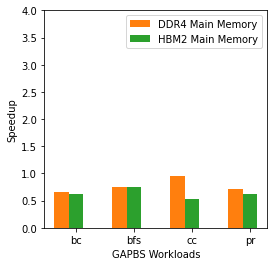

In [71]:
x = df['app']
x_axis = np.arange(len(x))

y = df['totBW'].astype(float)
y2 = df2['totBW'].astype(float)
y3 = df3['totBW'].astype(float)

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(4, 4)

plt.ylim([0,4])

plt.bar(x_axis -0.25, y/y2, width=0.25, color ='#ff7f0e', label = 'DDR4 Main Memory')
plt.bar(x_axis, y/y3, width=0.25, color='#2ca02d',label = 'HBM2 Main Memory')
#plt.bar(x_axis +0.25, y3, width=0.25, label = 'HBM2 Main Memory')

plt.xticks(x_axis, x)

# plt.title("Speedup of HBM2 DRAM cache over DDR4 and HBM2 Main Memory")
plt.xlabel("GAPBS Workloads")
plt.ylabel("Speedup")
plt.legend()
plt.show()

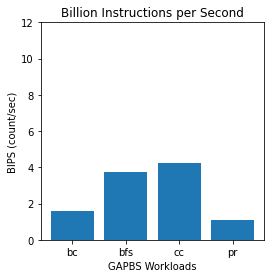

In [72]:
x = df['app']

y = (df['totNumInsts'].astype(float)/1000000000)/df['simSeconds'].astype(float)


# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(4, 4)

plt.ylim([0,12])

plt.bar(x, y)


plt.title("Billion Instructions per Second")
plt.xlabel("GAPBS Workloads")
plt.ylabel("BIPS (count/sec)")
plt.show()

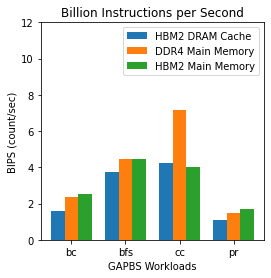

In [73]:
x = df['app']
x_axis = np.arange(len(x))

y = (df['totNumInsts'].astype(float)/1000000000)/df['simSeconds'].astype(float)
y2 = (df2['totNumInsts'].astype(float)/1000000000)/df2['simSeconds'].astype(float)
y3 = (df3['totNumInsts'].astype(float)/1000000000)/df3['simSeconds'].astype(float)


# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(4, 4)

plt.ylim([0,12])

plt.bar(x_axis -0.25, y, width=0.25, label = 'HBM2 DRAM Cache')
plt.bar(x_axis, y2, width=0.25, label = 'DDR4 Main Memory')
plt.bar(x_axis +0.25, y3, width=0.25, label = 'HBM2 Main Memory')

plt.xticks(x_axis, x)

plt.title("Billion Instructions per Second")
plt.xlabel("GAPBS Workloads")
plt.ylabel("BIPS (count/sec)")
plt.legend()
plt.show()

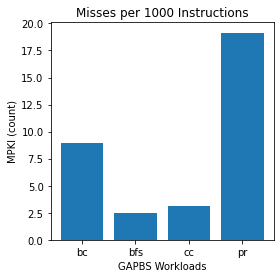

In [74]:
x = df['app']

y = df['numHotMisses'].astype(float)/(df['totNumInsts'].astype(float)/1000)


# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(4, 4)

#plt.ylim([0,5])

plt.bar(x, y)


plt.title("Misses per 1000 Instructions")
plt.xlabel("GAPBS Workloads")
plt.ylabel("MPKI (count)")
plt.show()

*******************************************************************

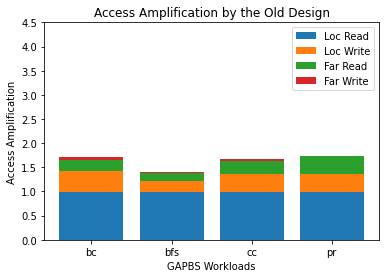

In [75]:
x = df['app']

y1 = df['system.loc_mem_ctrl.dram.readBursts'].astype(float) / (df['readReqs'].astype(float)+df['writeReqs'].astype(float))
y2 = df['system.loc_mem_ctrl.dram.writeBursts'].astype(float) / (df['readReqs'].astype(float)+df['writeReqs'].astype(float))
y3 = df['system.far_mem_ctrl.dram.readBursts'].astype(float) / (df['readReqs'].astype(float)+df['writeReqs'].astype(float))
y4 = df['system.far_mem_ctrl.dram.writeBursts'].astype(float) / (df['readReqs'].astype(float)+df['writeReqs'].astype(float))

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(6, 4)

plt.ylim([0,4.5])

plt.bar(x, y1, label = 'Loc Read')
plt.bar(x, y2, bottom=y1, label = 'Loc Write')
plt.bar(x, y3, bottom=y1+y2, label = 'Far Read')
plt.bar(x, y4, bottom=y1+y2+y3, label = 'Far Write')

plt.title("Access Amplification by the Old Design")
plt.xlabel("GAPBS Workloads")
plt.ylabel("Access Amplification")
plt.legend()
plt.show()

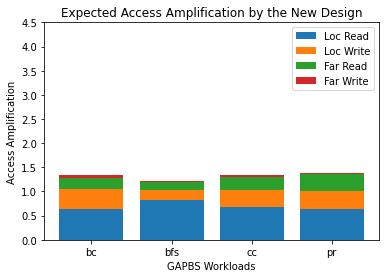

In [76]:
x = df['app']

y1 = df['numRdHitClean'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y2 = df['numRdHitDirty'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y3 = df['numWrHitClean'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y4 = df['numWrHitDirty'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))

y5 = df['numRdMissClean'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y6 = df['numRdMissDirty'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y7 = df['numWrMissClean'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y8 = df['numWrMissDirty'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))

y11 = y1+y2+y6+y8
y22 = y5+y6+y3+y4+y7+y8
y33 = y5+y6
y44 = y8+y6

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(6, 4)

plt.ylim([0,4.5])

plt.bar(x, y11, label = 'Loc Read')
plt.bar(x, y22, bottom=y11, label = 'Loc Write')
plt.bar(x, y33, bottom=y11+y22, label = 'Far Read')
plt.bar(x, y44, bottom=y11+y22+y33, label = 'Far Write')

plt.title("Expected Access Amplification by the New Design")
plt.xlabel("GAPBS Workloads")
plt.ylabel("Access Amplification")
plt.legend()
plt.show()

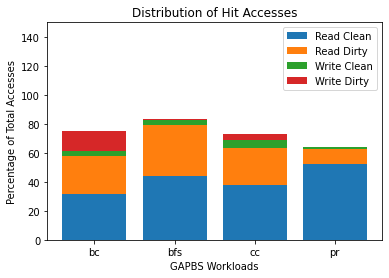

In [77]:
x = df['app']

y1 = 100*df['numRdHitClean'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y2 = 100*df['numRdHitDirty'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y3 = 100*df['numWrHitClean'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y4 = 100*df['numWrHitDirty'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(6, 4)

plt.ylim([0,150])

plt.bar(x, y1, label = 'Read Clean')
plt.bar(x, y2, bottom=y1, label = 'Read Dirty')
plt.bar(x, y3, bottom=y1+y2, label = 'Write Clean')
plt.bar(x, y4, bottom=y1+y2+y3, label = 'Write Dirty')

plt.title("Distribution of Hit Accesses")
plt.xlabel("GAPBS Workloads")
plt.ylabel("Percentage of Total Accesses")
plt.legend()
plt.show()

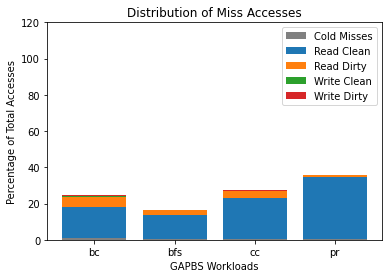

In [78]:
x = df['app']

y1 = 100 * df['numColdMisses'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y2 = 100 * (df['numRdMissClean'].astype(int)-df['numColdMisses'].astype(int))/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y3 = 100 * df['numRdMissDirty'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y4 = 100 * df['numWrMissClean'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y5 = 100 * df['numWrMissDirty'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(6, 4)

plt.ylim([0,120])

plt.bar(x, y1, label = 'Cold Misses', color='gray')
plt.bar(x, y2, bottom=y1, label = 'Read Clean')
plt.bar(x, y3, bottom=y1+y2,label = 'Read Dirty')
plt.bar(x, y4, bottom=y1+y2+y3, label = 'Write Clean')
plt.bar(x, y5, bottom=y1+y2+y3+y4, label = 'Write Dirty')

plt.title("Distribution of Miss Accesses")
plt.xlabel("GAPBS Workloads")
plt.ylabel("Percentage of Total Accesses")
plt.legend()
plt.show()